# Lab 3. Binomial Logistic Regression with Python


# Binomial regression model (Part I)
Throughout the following exercises, you will learn to use Python to build and evaluate a binomial logistic regression model. All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the lab, we will be using **numpy**, **pandas** and **scikit-learn** for operations and modelling, and **matplotlib** and **seaborn** for plotting.

## Relevant imports (Part I)

Begin by importing the relevant packages and modules.

In [4]:
# Import numpy, pandas, matplotlib.pyplot and seaborn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis (EDA)

In [6]:
# Load in a dataset from a csv-file
activity = pd.read_csv('activity.csv')

In [8]:
# Get summary statistics about the dataset
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [10]:
# Examine the dataset
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


## Construct binomial logistic regression model

For binomial logistic regression, we'll be using the `scikit-learn` package, which is frequently used for machine learning and more advanced data science topics. For the purposes of this exercise, we'll only load in the functions we need: `train_test_split()` and `LogisticRegression()`.

In [12]:
# Load in scikit-learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Then, we'll save the data into variables called X and y so we can use the `train_test_split()` function more easily.

In [14]:
# Save X and y data into variables
X = activity.iloc[:, 0].to_frame()
y = activity.iloc[:, 1].to_frame()

Then we'll split the data into training and holdout datasets. We set the `test_size` to `0.3` so that the holdout dataset is only 30% of the total data we have. We'll set the `random_state` equal to `42`. If you change this variable, then your results will be different from ours. Setting the `random_state` is mainly for reproducibility purposes.

In [16]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)

Then we'll build our classifier, and fit the model to the data by using the `.fit()` function. We'll save the fitted model as a variable called `clf`.

In [18]:
clf = linear_model.LogisticRegression().fit(X_train, y_train.values.ravel())

## Parameter estimates and Model visualization

We can use the `coef_` and `intercept_` attributes of the `clf` object to get the coefficient and intercept of our model.

In [20]:
# Print the coefficient - the Beta One
print('Beta One: {0:.2f}'.format(clf.coef_[0][0]))

Beta One: -0.12


In [22]:
# Print the intercept - the Beta Zero
print('Beta Zero: {0:.2f}'.format(clf.intercept_[0]))

Beta Zero: 6.10


So, based on what we've found, our model has an intercept or $\beta_0$ of 6.10 and a $\beta_1$ of -0.12.

Next, we can save our model's predictions by inputting the holdout sample, `X_test` into the model's `.predict()` function.

In [24]:
# Save predictions
y_pred = clf.predict(X_test)

We can print out the predicted labels. Recall that 0 means not lying down, and 1 means lying down.

In [26]:
# Print out the predicted labels
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

The model actually calculates a probability that given a particular value of X, the person is lying down. We can print out the predicted probabilities with the following lines of code:

In [28]:
# Print out the predicted probabilities
np.set_printoptions(suppress=True)
clf.predict_proba(X_test)[::, -1]

array([0.02316909, 0.99751164, 0.01042806, 0.0010567 , 0.99978127,
       0.01042806, 0.00466009, 0.99573398, 0.97234449, 0.02316909,
       0.99782566, 0.01362104, 0.0343614 , 0.99573398, 0.9988929 ,
       0.0575926 , 0.47729971, 0.00609785, 0.99873282, 0.9926958 ,
       0.03914006, 0.93171369, 0.96406407, 0.01556362, 0.98370868,
       0.01191938, 0.75510969, 0.87405854, 0.0343614 , 0.99164648,
       0.01777618, 0.01191938, 0.9971524 , 0.02643383, 0.9988929 ,
       0.01191938, 0.93171369, 0.99511938, 0.90093684, 0.92259526,
       0.08398421, 0.9996244 , 0.01191938, 0.80163072, 0.00533097,
       0.01362104, 0.03014442, 0.00355969, 0.00407281, 0.01191938,
       0.9988929 , 0.06538329, 0.00407281, 0.9988929 , 0.00912054,
       0.95342314, 0.00120974, 0.9890817 , 0.06538329, 0.99995057,
       0.00355969, 0.00466009, 0.09498513, 0.99971335, 0.00609785,
       0.00271875, 0.99873282, 0.9926958 , 0.02029681, 0.00466009,
       0.9926958 , 0.00466009, 0.00355969, 0.0008062 , 0.01777

Now we can plot our model and data with a 95% confidence band using the `regplot()` function from the `seaborn` package. Remember to set the argument `logistic=True` so that the function knows we are plotting a logistic regression model, not a linear regression model.

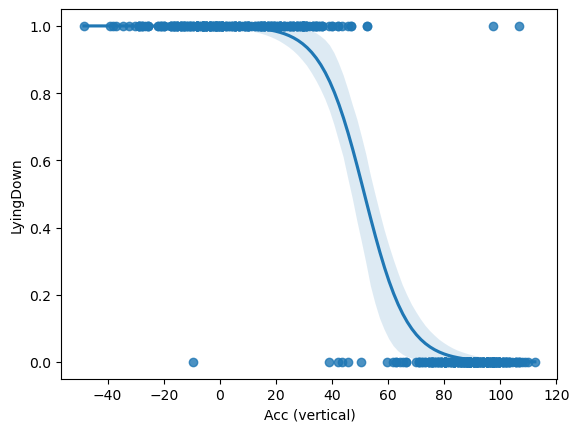

In [30]:
# Plot the logistic regression and its confidence band
sns.regplot(x = "Acc (vertical)", y = "LyingDown", data=activity, logistic=True)

# Confusion matrix (Part II)

This part of the notebook contains all of the code that will be presented in the second part of this lab. The focus is on **confusion matrices**, which are used to evaluate classification models, such as a binomial logistic regression model. 

**Note:** We are assuming that the earlier parts of this notebook have been run, and that the existing variables and imported packages have been saved. 

## Create confusion matrix



To create a confusion matrix, we'll use the [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) function from the `metrics` module of `scikit-learn`. To use the function, we'll need to input the following:
* Actual labels of the holdout sample, stored as `y_test`
* Predicted labels of the holdout sample, stored as `y_pred`
* The names of the labels, which you can access using `clf.classes_`

**Note:** If there were more classes, we would have more numbers or labels in `clf.classes_`. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [32]:
# Import the metrics module from scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [36]:
# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

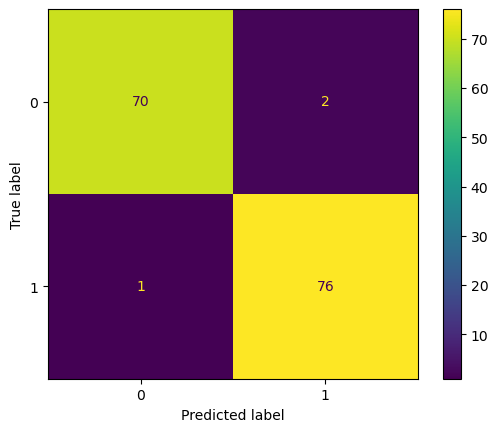

In [38]:
# Display the confusion matrix
disp.plot()

### Alternative way to create a confusion matrix using a helper function

In [40]:
# The helper conf_matrix_plot function
def conf_matrix_plot(model, X, y):
    
    model_pred = model.predict(X)
    cm = confusion_matrix(y, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(values_format='')
    plt.show()

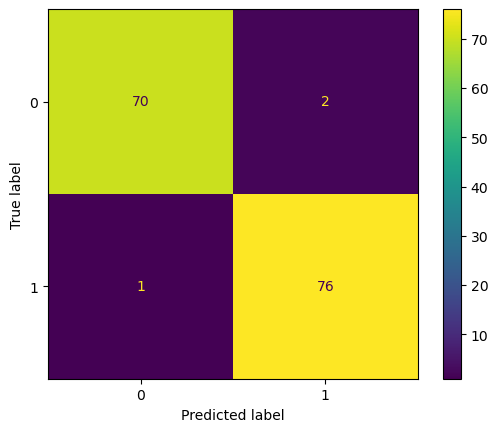

In [42]:
# Display confusion matrix
conf_matrix_plot(clf, X_test, y_test)

# Evaluation Metrics (Part III)

This part of the notebook contains all of the code that will be presented in the final part of this lab. The focus is on **evaluation metrics**, which are used to evaluate classification models including a binomial logistic regression model. 

**Note:** We are assuming that the earlier parts of this notebook have been run, and that the existing variables and imported packages have been saved.

First, begin by importing the relevant metrics from scikit-learn:

In [44]:
# Import metrics from scikit-learn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [46]:
# Calculate Precision score
print('Precision: {0:.2f}'.format(precision_score(y_test, y_pred)))

Precision: 0.97


In [48]:
# Calculate Recall score
print('Recall: {0:.2f}'.format(recall_score(y_test, y_pred)))

Recall: 0.99


In [50]:
# Calculate Accuracy score
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.98


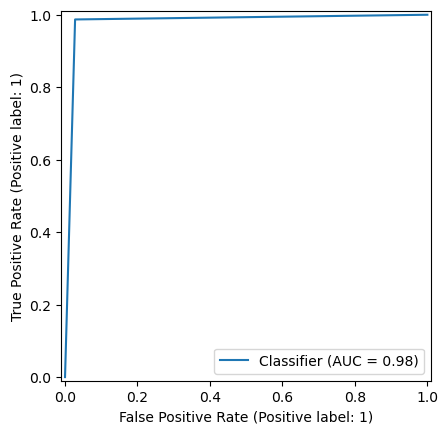

In [52]:
# Graph ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)

In [54]:
# Calculate AUC score
print('AUC score: {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC score: 0.98


**Congratulations!**
You now understand how to build and evaluate a binomial logistic regression model with Python.
Going forward, you can start using binomial logistic regression models with your own datasets.